# Exercise 5 - IART - Supervised Learning

### Adapted from Notebook by [Randal S. Olson](http://www.randalolson.com/), supported by [Jason H. Moore](http://www.epistasis.org/)
#### [University of Pennsylvania Institute for Bioinformatics](http://upibi.org/)

## 5.1 Software/Library Installation 
Scikit-learn is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms including neural networks, support vector machines, random forests, gradient boosting, k-means and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy.

Start by installing Python, Anaconda, Jupyter Labs, NumPy, SciPy, Pandas, Scikit-Learn, MatPlotLib and Seaborn. In fact, it is only needed to install Anaconda that contain all the others following the link: https://www.anaconda.com/products/individual 
Information about the rest of the packages/libraries may be found at: 

•	Python Website, https://www.python.org/   
•	Anaconda Website, https://www.anaconda.com/   
•	Project Jupyter Website, https://jupyter.org/   
•	NumPy Website, https://numpy.org/   
•	SciPy Website, https://www.scipy.org/  
•	Pandas Website, https://pandas.pydata.org/  
•	Scikit-Learn Website, https://scikit-learn.org/  
•	MatPlotLib Website, https://matplotlib.org/  
•	Seaborn Website, https://seaborn.pydata.org/  

After installing all the libraries, please continue with this example Notebook that contains an example code containing several exercises.

## 5.2 Iris flower data set – Data Preprocessing and Simple Classification

From Wikipedia - The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper “The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis”. It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species. Two of the three species were collected in the Gaspé Peninsula "all from the same pasture, and picked on the same day and measured at the same time by the same person with the same apparatus".

The data set consists of 50 samples from each of three species of Iris (Iris Setosa, Iris Virginica and Iris Versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. Based on the combination of these four features, Fisher developed a linear discriminant model to distinguish the species from each other. In this exercise we will use simple machine learning algorithms to analyze the dataset and create a model to classify the flowers in their specific type.

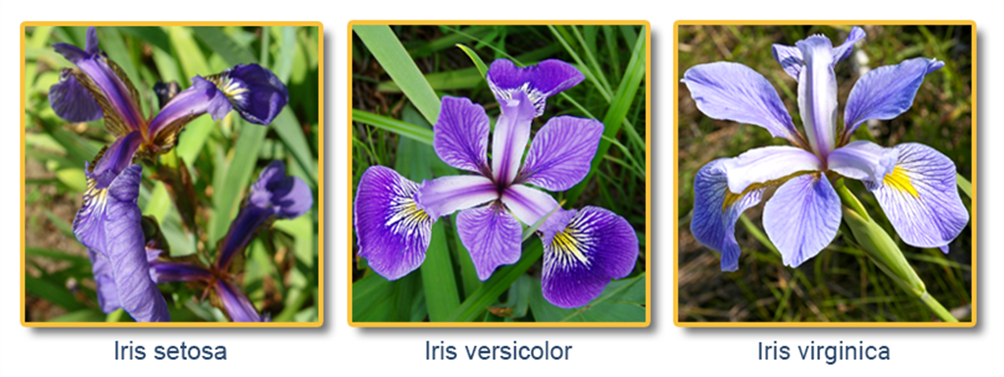

Let's start by reading the data into a pandas DataFrame.

a)	Unzip the file with the example notebook available at moodle ("iris-data.csv").

b)	Import the Pandas library, read the data from the CSV file and check the data using the head(), describe(), and other Pandas commands.

In [1]:
# Your Code Here
# ...

import pandas as pd

iris_data = pd.read_csv('iris-data.csv')

iris_data.head()
# iris_data.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


The first row in the data file defines the column headers, and the headers are descriptive enough for us to understand what each column represents. The headers even give us the units that the measurements were recorded in, just in case we needed to know at a later point in the project.

Each row following the first row represents an entry for a flower: four measurements and one class, which tells us the species of the flower.

One of the first things we should look for is missing data. Thankfully, the field researchers already told us that they put a 'NA' into the spreadsheet when they were missing a measurement. So, we can tell pandas to automatically identify missing values if it knows our missing value marker.

c)	Read again the data identifying as missing the values marked with ‘NA’. *(Note: [pandas.read_csv](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) already recognizes 'NA', which means this step is not really necessary for this specific marker.)*

In [3]:
# Your Code Here
# ...

Doing this, Pandas knows to treat rows with 'NA' as missing values. Next, it's always a good idea to look at the distribution of our data — especially the outliers. Let's start by printing out some summary statistics about the data set.

In [4]:
iris_data.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,145.000000
mean,5.644627,3.054667,3.758667,1.236552
std,1.312781,0.433123,1.764420,0.755058
min,0.055000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.400000
50%,5.700000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


We can see several useful values from this table. For example, we see that five `petal_width_cm` entries are missing. However, it is usually better to visualize the data in some way. Visualization makes outliers and errors immediately stand out, whereas they might go unnoticed in a large table of numbers. Since we know we're going to be plotting in this section, let's set up the notebook so we can plot inside of it.

d)	Import the MatPlotLib and Seaborn libraries and create a scatterplot matrix of the data 

A scatterplot plots the distribution of each column along the diagonal, and then plot a scatterplot matrix for the combination of each variable. It makes an efficient tool to look for errors in our data. We can even have the plotting package color each entry by its class to look for trends within the classes.

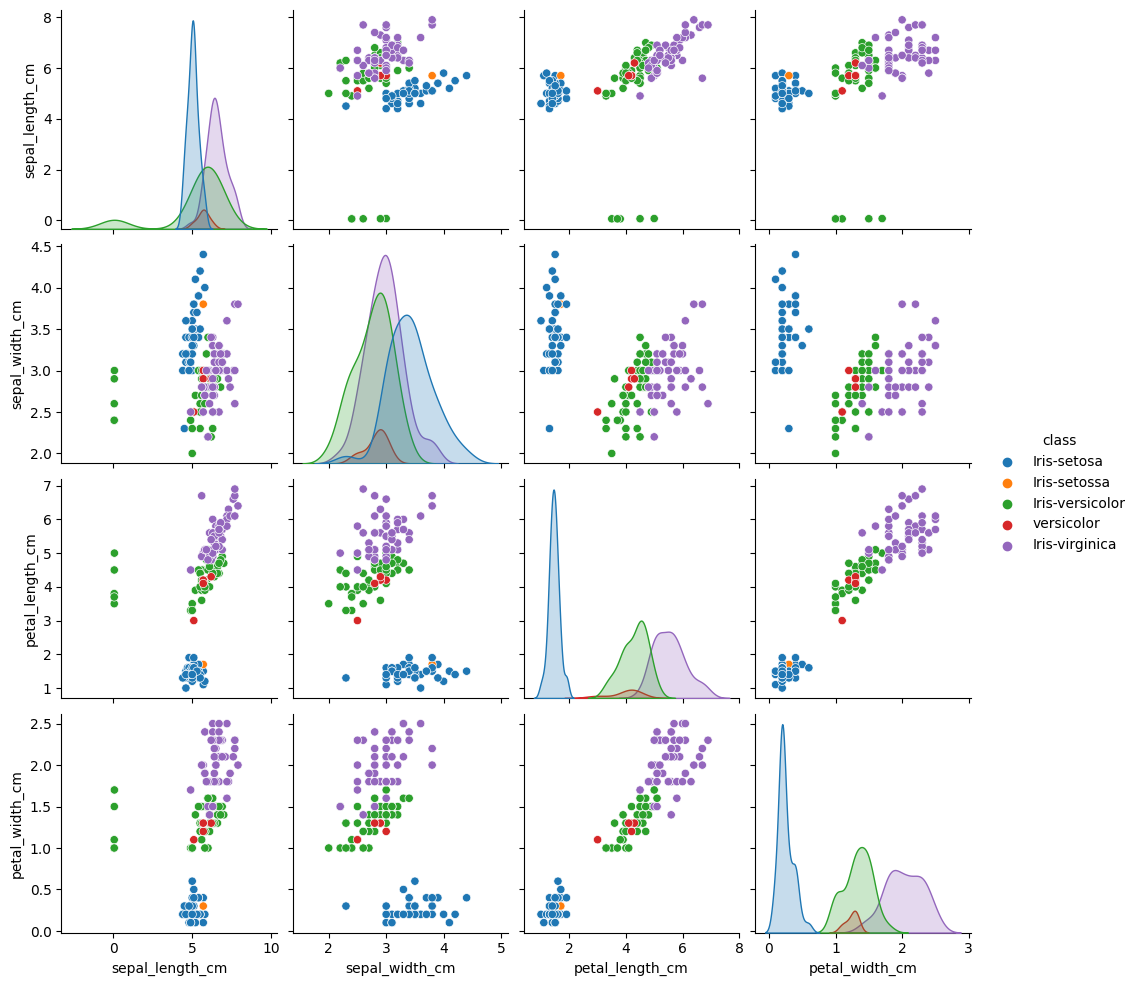

In [2]:
# This line tells the notebook to show plots inside of the notebook
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sb

# We have to temporarily drop the rows with 'NA' values # because the Seaborn plotting 
# function does not know what to do with them
sb.pairplot(iris_data.dropna(), hue='class')

From the scatterplot matrix, we can already see some issues with the data set:

1. There are five classes when there should only be three, meaning there were some coding errors.

2. There are some clear outliers in the measurements that may be erroneous: one `sepal_width_cm` entry for `Iris-setosa` falls well outside its normal range, and several `sepal_length_cm` entries for `Iris-versicolor` are near-zero for some reason.

3. We had to drop those rows with missing values.

In all of these cases, we need to figure out what to do with the erroneous data. Which takes us to the next step.

e)	After looking at the plot it seems that the field researchers make some errors inserting the data. It sounds like one of them forgot to add Iris- before their Iris-versicolor entries. The other extraneous class, Iris-setossa, was simply a typo that they forgot to fix. Use the DataFrame to fix these errors. Create a new scatterplot of the data.

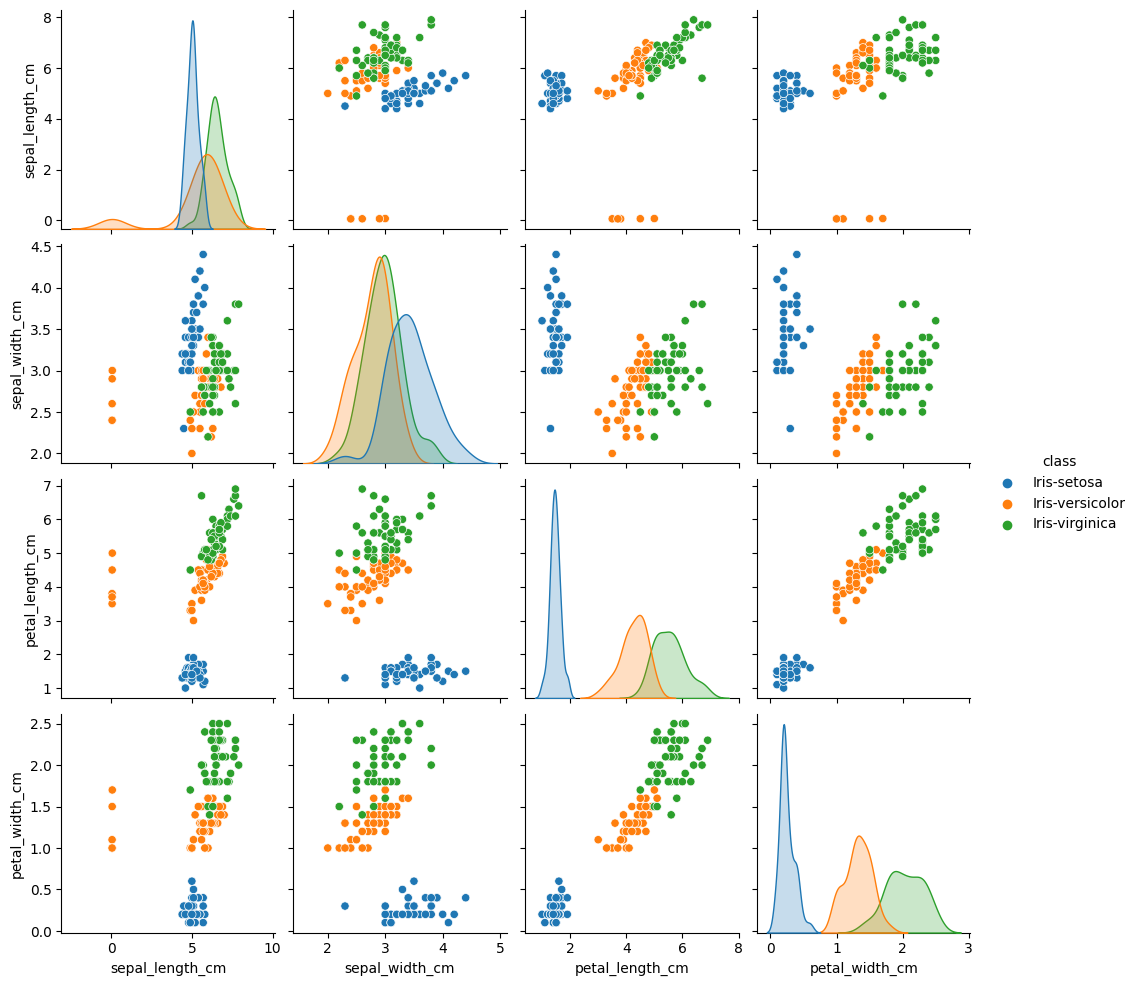

In [6]:
# Your Code Here
# ...

# Use data frame to replace the rows that have 'versicolor' with 'Iris-versicolor'
iris_data['class'] = iris_data['class'].replace('versicolor', 'Iris-versicolor')
iris_data['class'] = iris_data['class'].replace('Iris-setossa', 'Iris-setosa')

iris_data['class'].unique()
sb.pairplot(iris_data.dropna(), hue='class')

After this correction tihis is much better! Now we only have three class types. Imagine how embarrassing it would've been to create a model that used the wrong classes.

There are some clear outliers in the measurements that may be erroneous: one `sepal_width_cm` entry for `Iris-setosa` falls well outside its normal range, and several `sepal_length_cm` entries for `Iris-versicolor` are near-zero for some reason.

Fixing outliers can be tricky business. It's rarely clear whether the outlier was caused by measurement error, recording the data in improper units, or if the outlier is a real anomaly. For that reason, we should be judicious when working with outliers: if we decide to exclude any data, we need to make sure to document what data we excluded and provide solid reasoning for excluding that data. (i.e., "This data didn't fit my hypothesis" will not stand peer review.)

In the case of the one anomalous entry for `Iris-setosa`, let's say our field researchers know that it's impossible for `Iris-setosa` to have a sepal width below 2.5 cm. Clearly this entry was made in error, and we're better off just scrapping the entry than spending hours finding out what happened.

f)	Looking at the scatter plot, since it is impossible to have any 'Iris-setosa' rows with a sepal width less than 2.5 cm, drop those values and create an histogram with the 'Iris-setosa' sepal width.

In [7]:
# This line drops any 'Iris-setosa' rows with a separal width less than 2.5 cm
# Your Code Here
# Filter out the rows that have a low sepal length
# iris_data = iris_data[iris_data['sepal_length_cm'] > 1]

# Filter out the rows that have a low sepal width and are of the class Iris-setosa
iris_data = iris_data[(iris_data['sepal_width_cm'] > 2.5) | (iris_data['class'] != 'Iris-setosa')]

Excellent! Now all of our `Iris-setosa` rows have a sepal width greater than 2.5. 

g)	The next data issue to address is the several near-zero sepal lengths for the Iris-versicolor rows. Those rows were gathered in meters instead of cm. Please correct that mistake and draw the corresponding histogram. 

In [8]:
iris_data.loc[(iris_data['class'] == 'Iris-versicolor') & (iris_data['sepal_length_cm'] < 1.0)]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
77,0.067,3.0,5.0,1.7,Iris-versicolor
78,0.060,2.9,4.5,1.5,Iris-versicolor
79,0.057,2.6,3.5,1.0,Iris-versicolor
80,0.055,2.4,3.8,1.1,Iris-versicolor
81,0.055,2.4,3.7,1.0,Iris-versicolor


How about that? All of these near-zero `sepal_length_cm` entries seem to be off by two orders of magnitude, as if they had been recorded in meters instead of centimeters. After some brief correspondence with the field researchers, we find that one of them forgot to convert those measurements to centimeters. Let's do that for them.

<Axes: >

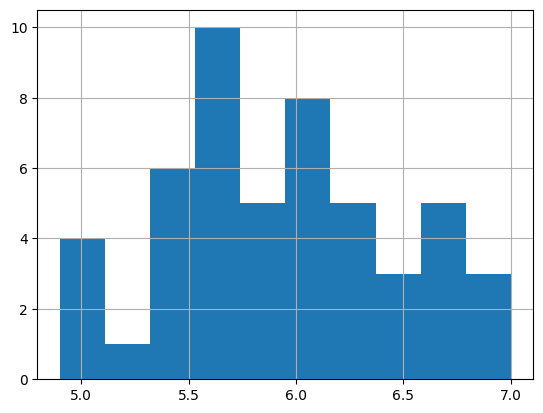

In [9]:
# Your Code Here
# ...

# Multiply by 100 the rows that have a sepal length less than 1.0 cm and are of the class Iris-versicolor
iris_data.loc[(iris_data['class'] == 'Iris-versicolor') & (iris_data['sepal_length_cm'] < 1.0), 'sepal_length_cm'] *= 100

iris_data.loc[iris_data['class'] == 'Iris-versicolor', 'sepal_length_cm'].hist()

So, we fixed those outliers. Let's take a look at the rows with missing values:

In [10]:
iris_data.loc[(iris_data['sepal_length_cm'].isnull()) |
              (iris_data['sepal_width_cm'].isnull()) |
              (iris_data['petal_length_cm'].isnull()) |
              (iris_data['petal_width_cm'].isnull())]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
7,5.0,3.4,1.5,NaN,Iris-setosa
8,4.4,2.9,1.4,NaN,Iris-setosa
9,4.9,3.1,1.5,NaN,Iris-setosa
10,5.4,3.7,1.5,NaN,Iris-setosa
11,4.8,3.4,1.6,NaN,Iris-setosa


It is not ideal that we had to drop those rows, especially considering they're all `Iris-setosa` entries. Since it seems like the missing data is systematic — all of the missing values are in the same column for the same *Iris* type — this error could potentially bias our analysis. One way to deal with missing data is mean imputation: If we know that the values for a measurement fall in a certain range, we can fill in empty values with the average of that measurement.

<Axes: >

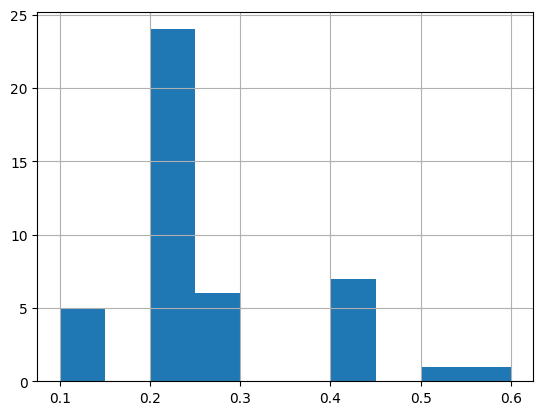

In [11]:
iris_data.loc[iris_data['class'] == 'Iris-setosa', 'petal_width_cm'].hist()

Most of the petal widths for `Iris-setosa` fall within the 0.2-0.3 range, so let's fill in these entries with the average measured petal width.

h) Do a mean imputation for the missing values of the petal widths for Iris-setosa and create a new scatter plot for the data.

<Axes: >

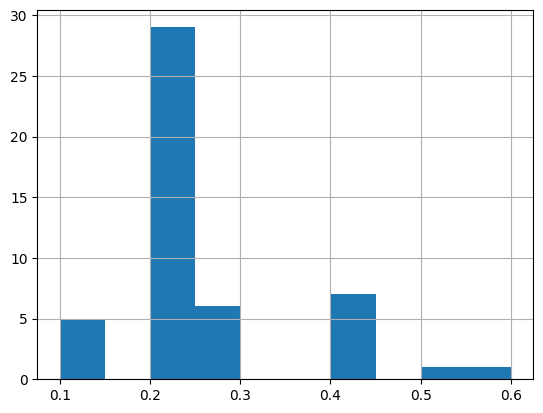

In [12]:
# Your Code Here
# ...

# Replace the missing values with the mean of the column
mean = iris_data.loc[iris_data['class'] == 'Iris-setosa' , 'petal_width_cm'].mean()
iris_data['petal_width_cm'] = iris_data['petal_width_cm'].fillna(mean)

iris_data.loc[iris_data['class'] == 'Iris-setosa', 'petal_width_cm'].hist()

In [13]:
iris_data.loc[(iris_data['sepal_length_cm'].isnull()) |
              (iris_data['sepal_width_cm'].isnull()) |
              (iris_data['petal_length_cm'].isnull()) |
              (iris_data['petal_width_cm'].isnull())]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class


Great! Now we've recovered those rows and no longer have missing data in our data set. Note: If you don't feel comfortable imputing your data, you can drop all rows with missing data with the `dropna()` call: iris_data.dropna(inplace=True)

After all this hard work, we don't want to repeat this process every time we work with the data set. Let's save the tidied data file *as a separate file* and work directly with that data file from now on.

i)	Save the new clean dataset to the disk with the name “iris-data-clean.csv”.

In [3]:
# Your Code Here
# ...

# Save the cleaned data to a new file
# iris_data.to_csv('iris-data-clean.csv', index=False)

iris_data_clean = pd.read_csv('iris-data-clean.csv')

Now, let's take a look at the scatterplot matrix now that we've tidied the data.

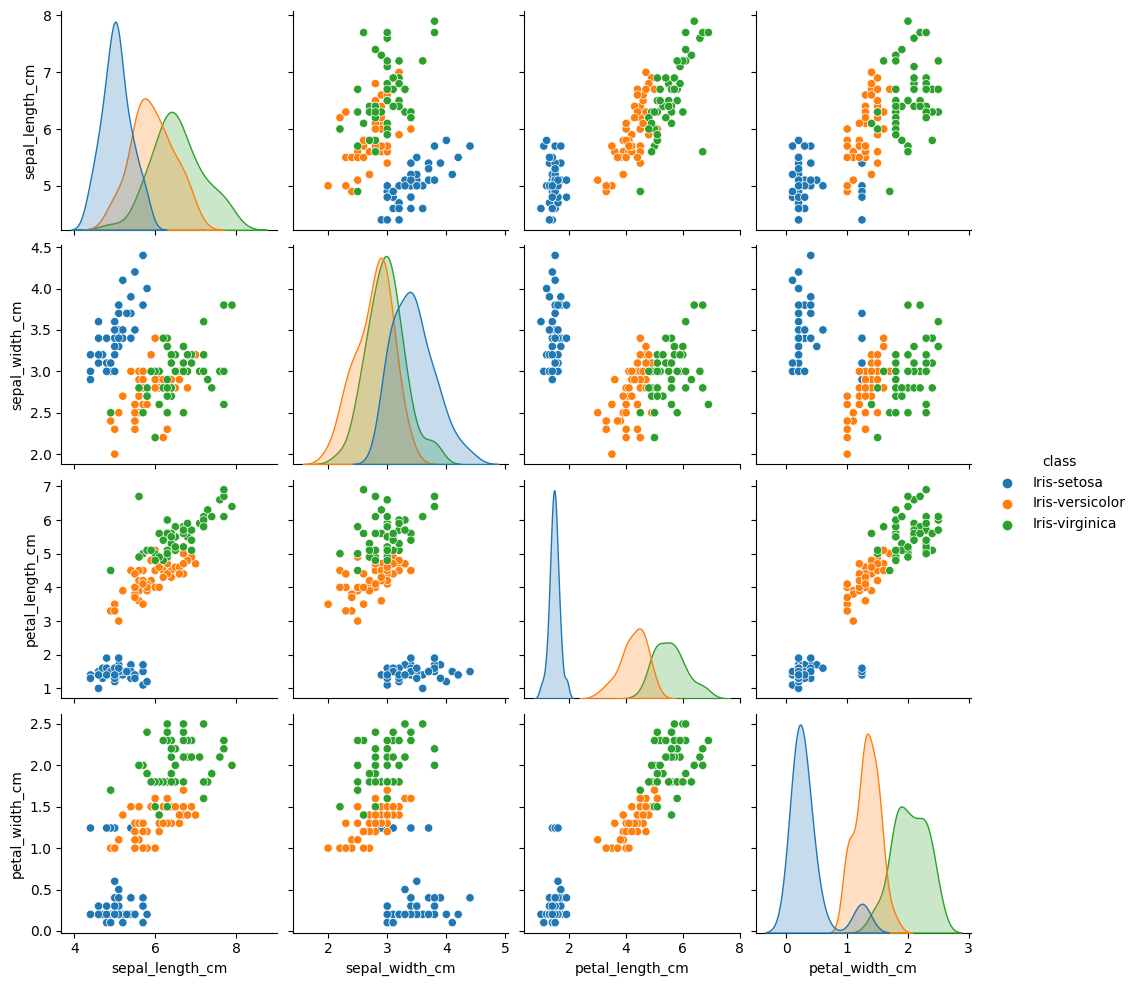

In [4]:
sb.pairplot(iris_data_clean, hue='class')

The data contained several errors to demonstrate some of the many possible scenarios you may face while tidying your data. The general takeaways here should be:
- Make sure your data is encoded properly
- Make sure your data falls within the expected range, and use domain knowledge whenever possible to define that expected range
- Deal with missing data in one way or another: replace it if you can or drop it
- Never tidy your data manually because that is not easily reproducible
- Use code as a record of how you tidied your data

Plot everything you can about the data at this stage of the analysis so you can *visually* confirm everything looks correct

After spending entirely too much time tidying our data, we can start analyzing it! Exploratory analysis is the step where we start delving deeper into the data set beyond the outliers and errors. We'll be looking to answer questions such as:

- How is my data distributed?
- Are there any correlations in my data?
- Are there any confounding factors that explain these correlations?
This is the stage where we plot all the data in as many ways as possible. Create many charts, but don't bother making them pretty — these charts are for internal use. 

Let's return to that scatterplot matrix that we used earlier.

There is a strange distribution of the petal measurements because of the different species. This is actually great news for our classification task since it means that the petal measurements will make it easy to distinguish between `Iris-setosa` and the other `Iris` types. Distinguishing `Iris-versicolor` and `Iris-virginica` will prove more difficult given how much their measurements overlap. There are also correlations between petal length and petal width, as well as sepal length and sepal width. The field biologists assure us that this is to be expected: Longer flower petals also tend to be wider, and the same applies for sepals. We can also make violin plots of the data to compare the measurement distributions of the classes. 

j)	Create some violin plots of the data to compare the measurement distributions of the classes. Violin plots contain the same information as box plots, but also scales the box according to the density of the data.

In [5]:
iris_data_clean.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,149.000000,149.000000,149.000000,149.000000
mean,5.847651,3.059732,3.775168,1.243056
std,0.799542,0.430104,1.758720,0.740768
min,4.400000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.400000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


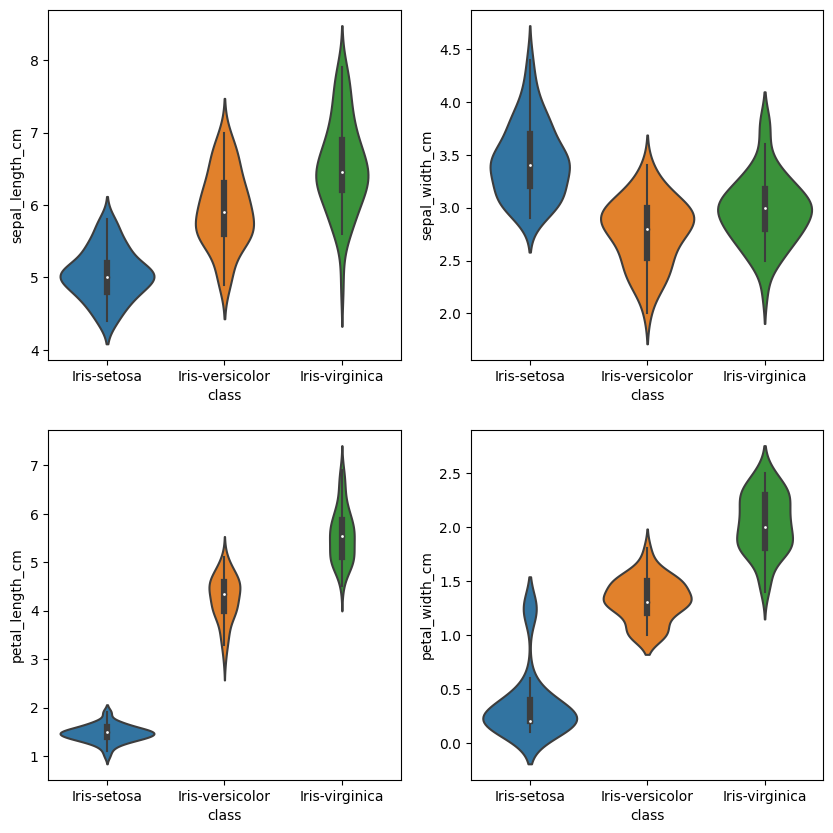

In [6]:
plt.figure(figsize=(10, 10))

for column_index, column in enumerate(iris_data_clean.columns):
    if column == 'class':
        continue
    plt.subplot(2, 2, column_index + 1)
    sb.violinplot(x='class', y=column, data=iris_data_clean)

## Classification

Lets start modeling the data! As tiresome as it can be, tidying and exploring our data is a vital component to any data analysis. If we had jumped straight to the modeling step, we would have created a faulty classification model. Remember: Bad data leads to bad models. Always check your data first.
Assured that our data is now as clean as we can make it — and armed with some cursory knowledge of the distributions and relationships in our data set — it's time to make the next big step in our analysis: Splitting the data into training and testing sets.
- training set: is a random subset of the data that we use to train our models.
- testing set: is a random subset of the data (mutually exclusive from the training set) that we use to validate our models on unforseen data.

Especially in sparse data sets like ours, it's easy for models to overfit the data: The model will learn the training set so well that it won't be able to handle most of the cases it's never seen before. This is why it's important for us to build the model with the training set, but score it with the testing set.

Note that once we split the data into a training and testing set, we should treat the testing set like it no longer exists: We cannot use any information from the testing set to build our model or else we're cheating. Let's set up our data first.

k) Create two variables with the inputs and labels using the clean dataset created. 

In [7]:
iris_data_clean = pd.read_csv('iris-data-clean.csv')

# We're using all four measurements as inputs
# Note that scikit-learn expects each entry to be a list of values, e.g.,
# [ [val1, val2, val3],
#   [val1, val2, val3],
#   ... ]
# such that our input data set is represented as a list of lists

# We can extract the data in this format from pandas like this:
all_inputs = iris_data_clean[['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm', 'petal_width_cm']].values

# Similarly, we can extract the class labels
all_labels = iris_data_clean['class'].values

# Make sure that you don't mix up the order of the entries
# all_inputs[5] inputs should correspond to the class in all_labels[5]

# Here's what a subset of our inputs looks like:
print(all_inputs[:5])
print(all_labels[:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa']


Now our data is ready to be split.

l)	import the train_test_split and create randomly training and testing sets with 75% of the examples on the training set and 25% on the testing set: training_inputs, testing_inputs, training_classes, testing_classes

In [9]:
from sklearn.model_selection import train_test_split

(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1)



With our data split, we can start fitting models to our data. Our company's Head of Data is all about decision tree classifiers, so let's start with one of those.

Decision tree classifiers are incredibly simple in theory. In their simplest form, decision tree classifiers ask a series of Yes/No questions about the data — each time getting closer to finding out the class of each entry — until they either classify the data set perfectly or simply can't differentiate a set of entries.

Here's an example decision tree classifier:

<img src="iris_dtc.png" />

Notice how the classifier asks Yes/No questions about the data — whether a certain feature is <= 1.75, for example — so it can differentiate the records. This is the essence of every decision tree.

The nice part about decision tree classifiers is that they are scale-invariant, i.e., the scale of the features does not affect their performance, unlike many Machine Learning models. In other words, it doesn't matter if our features range from 0 to 1 or 0 to 1,000; decision tree classifiers will work with them just the same. There are several parameters that we can tune for decision tree classifiers, but for now let's use a basic decision tree classifier.

m)	Import the DecisionTreeClassifier and train the classifier on the training set showing the final score/accuracy.

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Create the classifier using the DesicionTreeClassifier
classifier = DecisionTreeClassifier()

# Train the classifier on the training set
classifier = classifier.fit(training_inputs, training_classes)

# Validate the classifier on the testing set using classification accuracy
predictions = classifier.predict(testing_inputs)

print("Accuracy of Decision Tree: ", accuracy_score(testing_classes, predictions)*100, "%")


Accuracy of Decision Tree:  97.36842105263158 %


The model achieves 97% classification accuracy without much effort. However, there's a catch: Depending on how our training and testing set was sampled, our model can achieve anywhere from 80% to 100% accuracy.

n)	Experiment 1000 times the classifier and plot a histogram of the obtained accuracies. 

(array([  2.,   2.,  17.,  32.,   0.,  83., 211., 302., 257.,  94.]),
 array([0.78947368, 0.81052632, 0.83157895, 0.85263158, 0.87368421,
        0.89473684, 0.91578947, 0.93684211, 0.95789474, 0.97894737,
        1.        ]),
 <BarContainer object of 10 artists>)

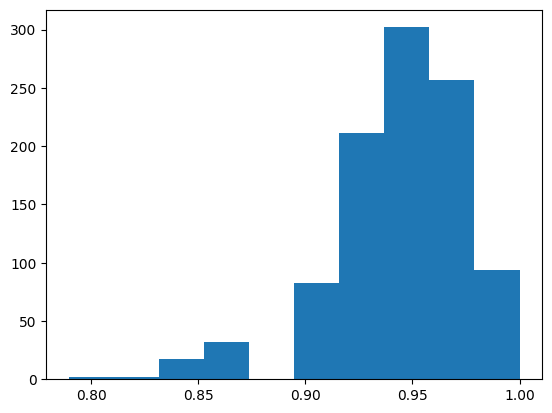

In [15]:
model_accuracies = []

for repetition in range(1000):
    (training_inputs,
     testing_inputs,
     training_classes,
     testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.25)

    # Create the classifier using the DesicionTreeClassifier
    classifier = DecisionTreeClassifier()

    # Train the classifier on the training set
    classifier = classifier.fit(training_inputs, training_classes)

    # Validate the classifier on the testing set using classification accuracy
    predictions = classifier.predict(testing_inputs)

    model_accuracies.append(accuracy_score(testing_classes, predictions))


plt.hist(model_accuracies)

It's obviously a problem that our model performs quite differently depending on the subset of the data it's trained on. This phenomenon is known as overfitting: The model is learning to classify the training set so well that it doesn't generalize and perform well on data it hasn't seen before. 

This problem is the main reason that most data scientists perform k-fold cross-validation on their models: Split the original data set into k subsets, use one of the subsets as the testing set, and the rest of the subsets are used as the training set. This process is then repeated k times such that each subset is used as the testing set exactly once. 10-fold cross-validation is the most common choice, so let's use that here. Performing 10-fold cross-validation on our data set looks something like this:(each square is an entry in our data set)

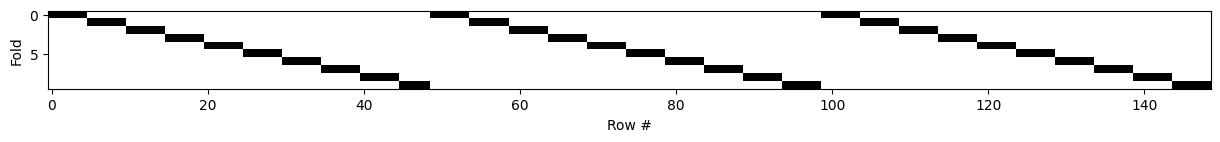

In [16]:
import numpy as np
from sklearn.model_selection import StratifiedKFold

def plot_cv(cv, features, labels):
    masks = []
    for train, test in cv.split(features, labels):
        mask = np.zeros(len(labels), dtype=bool)
        mask[test] = 1
        masks.append(mask)
    
    plt.figure(figsize=(15, 15))
    plt.imshow(masks, interpolation='none', cmap='gray_r')
    plt.ylabel('Fold')
    plt.xlabel('Row #')

plot_cv(StratifiedKFold(n_splits=10), all_inputs, all_labels)

You'll notice that we used Stratified k-fold cross-validation in the code above. Stratified k-fold keeps the class proportions the same across all of the folds, which is vital for maintaining a representative subset of our data set. (e.g., so we don't have 100% `Iris setosa` entries in one of the folds.)

o)	Import StratifiedKFold and use stratified cross-validation with 10 splits and train again the data.

Text(0.5, 1.0, 'Average score: 0.96')

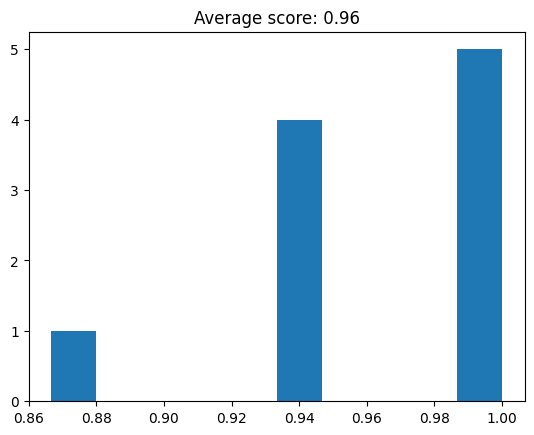

In [17]:
from sklearn.model_selection import cross_val_score

decision_tree_classifier = DecisionTreeClassifier()

# cross_val_score returns a list of the scores, which we can visualize
# to get a reasonable estimate of our classifier's performance
cv_scores = cross_val_score(decision_tree_classifier, all_inputs, all_labels, cv=10)
plt.hist(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))

Now we have a much more consistent rating of our classifier's general classification accuracy. However, every Machine Learning model comes with a variety of parameters to tune, and these parameters can be vitally important to the performance of our classifier. For example, if we severely limit the depth of our decision tree classifier:

[0.66666667 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667
 0.66666667 0.66666667 0.66666667 0.64285714]


Text(0.5, 1.0, 'Average score: 0.6642857142857144')

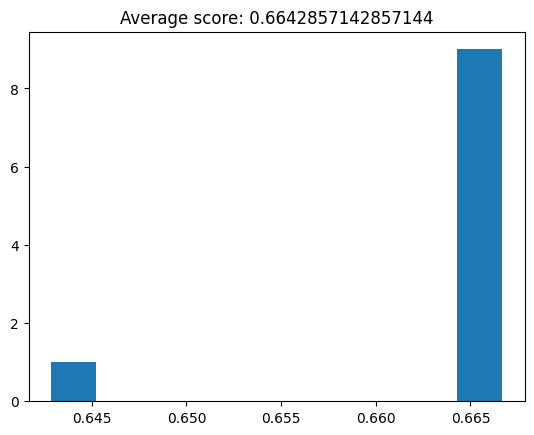

In [19]:
decision_tree_classifier = DecisionTreeClassifier(max_depth=1)

cv_scores = cross_val_score(decision_tree_classifier, all_inputs, all_labels, cv=10)
plt.hist(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))

The classification accuracy falls tremendously! Therefore, we need to find a systematic method to discover the best parameters for our model and data set. 

The most common method for model parameter tuning is Grid Search. The idea behind Grid Search is simple: explore a range of parameters and find the best-performing parameter combination. Focus your search on the best range of parameters, then repeat this process several times until the best parameters are discovered.

Let's tune our decision tree classifier. We'll stick to only two parameters for now, but it's possible to simultaneously explore dozens of parameters if we want.

p)	Import GridSearchCV and perform a Grid Search over the Decision Tree parameters to find the best parameters, visualizing the grid with the accuracies for each parameter’s pairs (max_features 1-4 and max_depth 1-5). 

In [35]:
from sklearn.model_selection import GridSearchCV

decision_tree_classifier = DecisionTreeClassifier()

parameter_grid = {'max_depth': [1, 2, 3, 4, 5],
                  'max_features': [1, 2, 3, 4]}

cross_validation = 5

grid_search = GridSearchCV(decision_tree_classifier, param_grid=parameter_grid, cv=cross_validation)

grid_search.fit(all_inputs, all_labels)

print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.9733333333333334
Best parameters: {'max_depth': 3, 'max_features': 4}


Now let's visualize the grid search to see how the parameters interact.

q)	Visualize in a graphical manner the final decision tree achieved. 

Text(50.722222222222214, 0.5, 'max_depth')

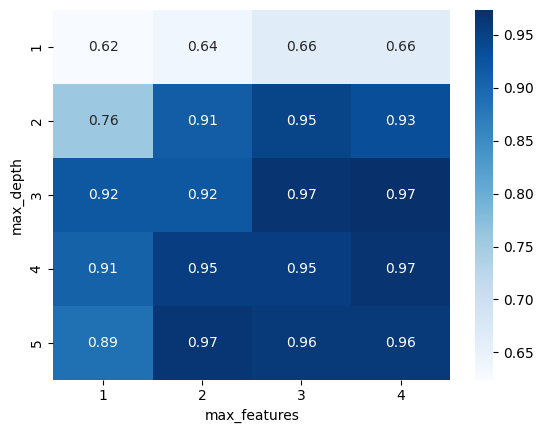

In [36]:
grid_visualization = grid_search.cv_results_['mean_test_score']
grid_visualization.shape = (5, 4)
sb.heatmap(grid_visualization, cmap='Blues', annot=True)
plt.xticks(np.arange(4) + 0.5, grid_search.param_grid['max_features'])
plt.yticks(np.arange(5) + 0.5, grid_search.param_grid['max_depth'])
plt.xlabel('max_features')
plt.ylabel('max_depth')

Now we have a better sense of the parameter space: We know that we need a `max_depth` of at least 2 to allow the decision tree to make more than a one-off decision. `max_features` doesn't really seem to make a big difference here as long as we have 2 of them, which makes sense since our data set has only 4 features and is relatively easy to classify. (Remember, one of our data set's classes was easily separable from the rest based on a single feature.) Let's go ahead and use a broad grid search to find the best settings for a handful of parameters.

In [70]:
decision_tree_classifier = DecisionTreeClassifier()

parameter_grid = {'criterion': ['gini', 'entropy'],
                  'splitter': ['best', 'random'],
                  'max_depth': [1, 2, 3, 4, 5],
                  'max_features': [1, 2, 3, 4]}

cross_validation = StratifiedKFold(n_splits=10)

grid_search = GridSearchCV(decision_tree_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(all_inputs, all_labels)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.96
Best parameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': 4, 'splitter': 'best'}


Now we can take the best classifier from the Grid Search and use that:

In [71]:
decision_tree_classifier = grid_search.best_estimator_
decision_tree_classifier

DecisionTreeClassifier(max_depth=3, max_features=4)

We can even visualize the decision tree with [GraphViz](http://www.graphviz.org/) to see how it's making the classifications:

In [ ]:
import sklearn.tree as tree

with open('iris_dtc.dot', 'w') as out_file:
    out_file = tree.export_graphviz(decision_tree_classifier, out_file=out_file)

<img src="iris_dtc.png" />